In [1]:
import numpy as np
import math
from sympy import *
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def chi2(p,q,r,s,t,u):
    stat = 0
    R = p+r+t; S = q+s+u; n = R+S
    if R == 0 or S == 0:
        return stat
    else:
        if p+q != 0:
            stat += ((n*p - (p+q)*R)**2)/((p+q)*R*S)
        if r+s != 0:
            stat += ((n*r - (r+s)*R)**2)/((r+s)*R*S)
        if t+u != 0:
            stat += ((n*t - (t+u)*R)**2)/((t+u)*R*S)
        return stat

In [3]:
def DOLS(p,q,r,s,t,u):
    stat = chi2(p,q,r,s,t,u); v = np.zeros(0)
    M = chi2(p,q,r,s,t,u); m = chi2(p,q,r,s,t,u)
    if p >= 1 and q >= 1:
        v = [chi2(p-1,q,r+1,s,t,u), chi2(p-1,q,r,s,t+1,u),chi2(p,q-1,r,s+1,t,u), chi2(p,q-1,r,s,t,u+1)]
        M = max([max(v),M])
        m = min([min(v),m])
    if r >= 1 and s >= 1:
        v = [chi2(p+1,q,r-1,s,t,u), chi2(p,q,r-1,s,t+1,u),chi2(p,q+1,r,s-1,t,u), chi2(p,q,r,s-1,t,u+1)]
        M = max([max(v),M])
        m = min([min(v),m])
    if t >= 1 and u >= 1:
        v = [chi2(p+1,q,r,s,t-1,u), chi2(p,q,r+1,s,t-1,u), chi2(p,q+1,r,s,t,u-1), chi2(p,q,r,s+1,t,u-1)]
        M = max([max(v),M])
        m = min([min(v),m])
    
    dolsp = M-stat; dolsn = stat-m
    return dolsp, dolsn

In [4]:
def DOLS_all(n):
    dolsp = np.zeros((int(n/2)+1,int(n/2)+1,int(n/2)+1,int(n/2)+1)); dolsn = np.zeros((int(n/2)+1,int(n/2)+1,int(n/2)+1,int(n/2)+1))
    for p in range(int(n/2)+1):
        for q in range(int(n/2)+1):
            for r in range(int(n/2)-p+1):
                for s in range(int(n/2)-q+1):
                    t = int(n/2)-p-r
                    u = int(n/2)-q-s
                    if p+q >= 1 and r+s >= 1 and t+u >= 1:
                        dolsp[p][q][r][s], dolsn[p][q][r][s] = DOLS(p,q,r,s,t,u)
    return dolsp, dolsn

In [5]:
def S(n): #max(LS(x')/LS(x)) (LS(x) != 0)
    dolsp,dolsn = DOLS_all(n)
    
    vp = 1; vn = 1
    for p in range(int(n/2)+1):
        for q in range(int(n/2)+1):
            for r in range(int(n/2)-p+1):
                for s in range(int(n/2)-q+1):
                    t = int(n/2)-p-r
                    u = int(n/2)-q-s
                    if p+q >= 1 and r+s >= 1 and t+u >= 1:
                        ssp = dolsp[p][q][r][s]; ssn = dolsn[p][q][r][s]
                        if p >= 1 and q >= 1:
                            ssp = max([dolsp[p-1][q][r+1][s], dolsp[p-1][q][r][s],
                                       dolsp[p][q-1][r][s+1], dolsp[p][q-1][r][s], ssp])
                            ssn = max([dolsn[p-1][q][r+1][s], dolsn[p-1][q][r][s],
                                       dolsn[p][q-1][r][s+1], dolsn[p][q-1][r][s], ssn])
                        if r >= 1 and s >= 1:
                            ssp = max([dolsp[p+1][q][r-1][s], dolsp[p][q][r-1][s],
                                       dolsp[p][q+1][r][s-1], dolsp[p][q][r][s-1], ssp])
                            ssn = max([dolsn[p+1][q][r-1][s], dolsn[p][q][r-1][s],
                                       dolsn[p][q+1][r][s-1], dolsn[p][q][r][s-1], ssn])
                        if t >= 1 and u >= 1:
                            ssp = max([dolsp[p+1][q][r][s], dolsp[p][q][r+1][s],
                                       dolsp[p][q+1][r][s], dolsp[p][q][r][s+1], ssp])
                            ssn = max([dolsn[p+1][q][r][s], dolsn[p][q][r+1][s],
                                       dolsn[p][q+1][r][s], dolsn[p][q][r][s+1], ssn])
                        if dolsp[p][q][r][s] != 0 and dolsn[p][q][r][s] != 0:
                            vp = max([ssp/dolsp[p][q][r][s], vp])
                            vn = max([ssn/dolsn[p][q][r][s], vn])

    return vp,vn

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


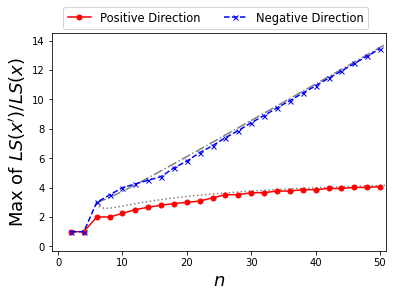

In [6]:
maxRP = np.zeros(25); maxRN = np.zeros(25); index = np.zeros(25)

for i in range(25):
    maxRP[i], maxRN[i] = S(2*(i+1))
    index[i] = 2*(i+1)

fig = plt.figure()
plt.ylim(-0.3, 14.5)
plt.xlim(-1, 51)
x = np.arange(6.0, 51, 0.02)
#plt.plot(x,x/4+1.5,color="black", linestyle = "dotted")
plt.plot(x,(x*(x+2))/(4*(x-2)),color="gray", linestyle = "dashdot")
plt.plot(x,(5*(x-3)*(x-4)*(x+7))/(x*(x-5)*(x+16)),color="gray", linestyle = "dotted")
#plt.plot(x,((x-4)*(5*x**2+20*x-108))/(x*(x**2+12*x-76)),color="gray", linestyle = "dotted")
plt.plot(index, maxRP, marker="o", markersize=5, color = "red", linestyle = "-", label = "Positive Direction")
plt.plot(index, maxRN, marker="x", markersize=5, color = "blue", linestyle = "--", label = "Negative Direction")
plt.xlabel("$n$", fontsize = 18)
plt.ylabel("Max of $LS(x')/LS(x)$", fontsize = 18)
plt.legend(bbox_to_anchor=(0.49, 1.02), loc='lower center', borderaxespad=0, ncol=2, fontsize=11.5)
fig.savefig("goodBeta_chi2.png")
fig.savefig("figs/goodBeta_chi2.eps", bbox_inches="tight", pad_inches=0.05)